In [1]:
import numpy as np
import pandas as pd
from cvxpy import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.svm import SVC

In [2]:
data=pd.read_csv('./iris.csv')
# print(data['iris'])

In [4]:
X=data[['sepal length','petal width']]
y=data['iris']
q=list(y)
for i in range(len(q)):
    if q[i]=='Iris-setosa':
        q[i]=1
    else:
        q[i]=-1
ynew=pd.DataFrame({'iris':q})
# print(y)
trainX,testX,trainy,testy=train_test_split(X,ynew,test_size=0.2,random_state=7)
int(testy.iloc[0])
# print(testy)

-1

# 1st Ans (a)

In [4]:
def hardprimal(trainX,trainy):
    w=Variable(2)
    b=Variable(1)
    ss=sum(square(w))
    objective  = Minimize(ss)
    constraints=[]
    for i in range(len(trainX)):
        cc=list(trainX.iloc[i])
#         yi=int(trainy.iloc[i])
        constraints=constraints+[(cc[0]*w[0]+cc[1]*w[1]+b)*int(trainy.iloc[i])>=1]
    p=Problem(objective,constraints)
    p.solve()
    neww=[]
    for i in range(len(constraints)):
        neww=neww+[float(constraints[i].dual_value)]
    return w.value,b.value,neww

In [5]:
def hardprimaltester(testX,weights,b):
    ans=[]
    for i in range(len(testX)):
        cc=list(testX.iloc[i])
        val=cc[0]*weights[0]+cc[1]*weights[1]+b
        if val>0:
            ans+=[1]
        elif val==0:
            ans+=[0]
        else:
            ans+=[-1]
    return ans

In [6]:
def getsv(testX,weights,b):
    ind=[]
    for i in range(len(testX)):
        cc=list(testX.iloc[i])
        val=cc[0]*weights[0]+cc[1]*weights[1]+b
        e=np.abs(val)
        if e<=1.1:
            ind+=[1]
        else:
            ind+=[0]
    f1=[]
    f2=[]
    for i in range(len(ind)):
        if ind[i]==1:
            cc=list(testX.iloc[i])
            f1=f1+[cc[0]]
            f2=f2+[cc[1]]
    svs=pd.DataFrame({'sepal length':f1,'petal width':f2})
    return svs

# (i)

In [7]:
w_s,b,constraints=hardprimal(X,ynew)
print(w_s,b)

[ 4.32064122e-04 -5.00307012e+00] [4.00060829]


# (ii)

In [9]:
w_s,b,constraints=hardprimal(X,ynew)
print(w_s,b)
# answer=hardprimaltester(testX,w_s,b)
# print(constraints)
for i in range(len(constraints)):
    if constraints[i]>0.0000001:
        print(constraints[i])

[ 4.32064122e-04 -5.00307012e+00] [4.00060829]
25.0131040835506
8.861480067628058
7.326718659964156
0.19509853806054847
0.09715274750741791
0.04383070465852829
1.1620390857383258
7.326718659964156


# (iii)

In [11]:
def newhardprimaltester(testX,weights,b):
    ans=[]
    for i in range(len(testX)):
        cc=list(testX.iloc[i])
        val=cc[0]*weights[0]+cc[1]*weights[1]+b
        ans+=[val]
    return ans

Text(0.5,1,'Decision surface: 0.0004*sepal_length + -5.00*petal_width 4.0 = 0')

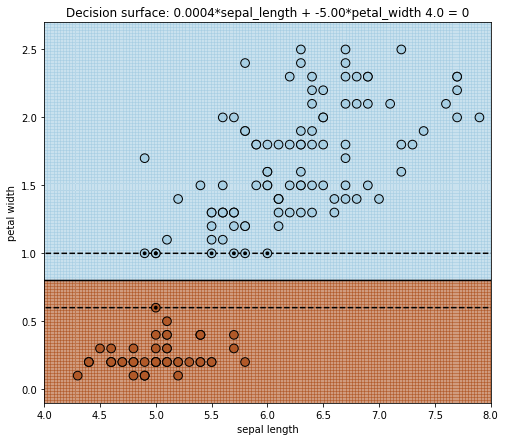

In [13]:
svs=getsv(X,w_s,b)
f, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = [8,7]
# plt.axis('tight')
ax.scatter(X['sepal length'], X['petal width'], c = q, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=75)
ax.scatter(svs['sepal length'],svs['petal width'],s=15, lw=0.001, facecolors='none',zorder=10,c='k', edgecolors='none')
x_min = X['sepal length'].min()-1
x_max = X['sepal length'].max()+1
y_min = X['petal width'].min()-1
y_max = X['petal width'].max()+1
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
new_df=pd.DataFrame({'f1':list(XX.ravel()),'f2':list(YY.ravel())})
Z=np.array(newhardprimaltester(new_df,w_s,b))
Z = Z.reshape(XX.shape)
plt.xlim([4,8])
plt.ylim([-0.1,2.7])
ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)
ax.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-','--'], levels=[-1, 0,1])
ax.set_xlabel("sepal length")
ax.set_ylabel("petal width")
ax.set_title('Decision surface: '+str(w_s[0])[:6]+'*sepal_length + '+str(w_s[1])[:5]+'*petal_width '+str(float(b))[:3]+' = 0')

# (iv)

[[-1.46160676e-04 -4.99965020e+00]]
[4.00046664]


C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5,1,'Linear Kernel with C= 40\n Number of support vectors = 3')

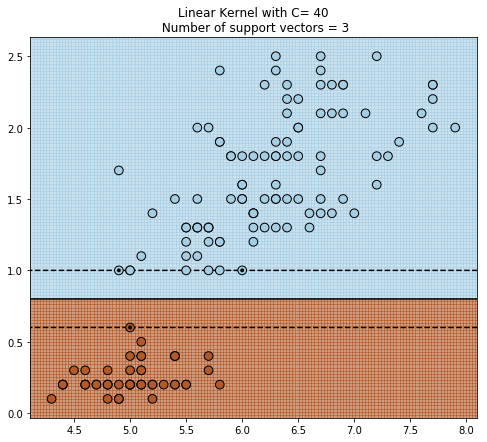

In [14]:
from sklearn import svm
X_train = np.array(X.values.tolist())
y_train = np.array(ynew.values.tolist())
C=40
clf = svm.SVC(kernel='linear',C = C )
clf.fit(X_train, y_train)
plt.figure(1)
plt.clf()
plt.scatter(X_train[:, 0], X_train[:, 1], c=q, zorder=10, cmap=cm.Paired,alpha=1,edgecolor='k',s=75)
plt.axis('tight')
x_min = X_train[:, 0].min()-1
x_max = X_train[:, 0].max()+1
y_min = X_train[:, 1].min()-1
y_max = X_train[:, 1].max()+1
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=cm.Paired, alpha=0.6)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=15, lw=0.001, facecolors='none',zorder=10,c='k', edgecolors='none');
print(clf.coef_)
print(clf.intercept_)
plt.title("Linear Kernel with C= {}\n Number of support vectors = {}".format(C, len(clf.support_vectors_)))

# (V)

Yes, if we throw away all the points except support vectors the decision boundary still remains same.

Because, only the constraints corresponding to support vectors would suffice to learn the boundary irrespective of binding constraints of non-support vectors. Specially in dual form we can see that the "$\alpha_i$" values are non zero only for support vectors, which imply that only the constraints corresponding to support vectors are enough to learn the decision boundary.

# Part-b

In [15]:
def softprimal(trainX,trainy,Cval):
    w=Variable(2)
    b=Variable(1)
    Cval=Cval
    m=int(len(trainX))
    epsiln=Variable(m)
    ss=sum(square(w))/2
    hinge=[]
    for i in range(len(trainX)):
        cc=list(trainX.iloc[i])
        yi=int(trainy.iloc[i])
        hinge=hinge+[pos(1-yi*(cc[0]*w[0]+cc[1]*w[1]+b))]
    ss=ss+Cval*sum(hinge)
    objective  = Minimize(ss)
    constraints=[]
    p=Problem(objective)
    p.solve()
    return w.value,b.value

(i) No, we could not use the Autograd to learn SVM when formulated as hinge loss penalty. The hinge loss function is not differentiable hence we cannot use Autograd to learn the parameters.

# (ii)

In [5]:
X2=data[['sepal length','sepal width']]
y2=data['iris']
q2=list(y)
for i in range(len(q2)):
    if q2[i]=='Iris-virginica':
        q2[i]=1
    else:
        q2[i]=-1
ynew2=pd.DataFrame({'iris':q2})
# print(y)
trainX2,testX2,trainy2,testy2=train_test_split(X2,ynew2,test_size=0.2,random_state=7)
int(testy2.iloc[0])

1

In [10]:
len(X2)

150

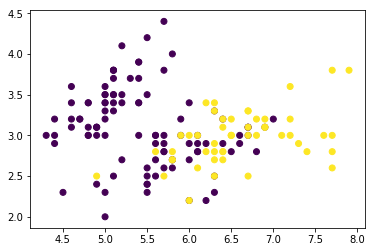

In [11]:
axes=plt.gca()
r=[0 for i in range(100)]
for i in range(50):
    r=r+[1]
axes.scatter(X2['sepal length'],X2['sepal width'],c=r)

In [17]:
w_s2,b2=softprimal(X2,ynew2,5)
print(w_s2,b2)

[ 1.81812759e+00 -1.54193865e-05] [-11.36318045]


# (iii)

In [19]:
def getsoftsv(testX,y,weights,b):
    ind=[]
    for i in range(len(testX)):
        cc=list(testX.iloc[i])
        yi=int(y.iloc[i])
        val=1-yi*(cc[0]*weights[0]+cc[1]*weights[1]+b)
        if val==0:
            ind+=[1]
        elif val>0:
            ind+=[1]
        else:
            ind+=[0]
    f1=[]
    f2=[]
    for i in range(len(ind)):
        if ind[i]==1:
            cc=list(testX.iloc[i])
            f1=f1+[cc[0]]
            f2=f2+[cc[1]]
    svs=pd.DataFrame({'sepal length':f1,'sepal width':f2})
    return svs

Text(0.5,1,'Decision surface: 1.8181*sepal_length + -1.54*sepal_width -11 = 0')

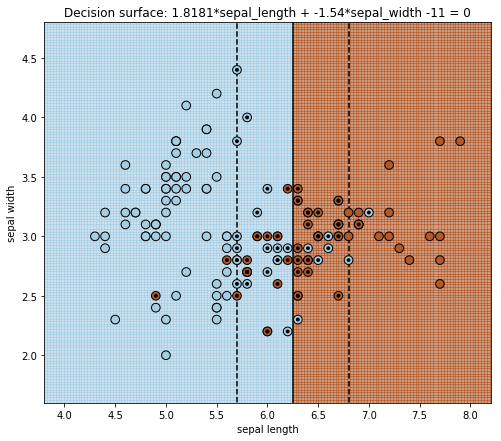

In [20]:
svs2=getsoftsv(X2,ynew2,w_s2,b2)
f, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = [8,7]
# plt.axis('tight')
ax.scatter(X2['sepal length'], X2['sepal width'], c = q2, zorder=10, cmap =cm.Paired, edgecolors='k', alpha=1, s=75)
ax.scatter(svs2['sepal length'],svs2['sepal width'],s=15, lw=0.001, facecolors='none',zorder=10,c='k', edgecolors='none')
x_min = X2['sepal length'].min()-1
x_max = X2['sepal length'].max()+1
y_min = X2['sepal width'].min()-1
y_max = X2['sepal width'].max()+1
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
new_df2=pd.DataFrame({'f1':list(XX.ravel()),'f2':list(YY.ravel())})
Z=np.array(newhardprimaltester(new_df2,w_s2,b2))
Z = Z.reshape(XX.shape)
plt.xlim([3.8,8.2])
plt.ylim([1.6,4.8])
ax.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)
ax.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-','--'], levels=[-1, 0,1])
ax.set_xlabel("sepal length")
ax.set_ylabel("sepal width")
ax.set_title('Decision surface: '+str(w_s2[0])[:6]+'*sepal_length + '+str(w_s2[1])[:5]+'*sepal_width '+str(float(b2))[:3]+' = 0')

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 1.81841283e+00 -4.88943297e-04]]
[-11.36338459]


Text(0.5,1,'Linear Kernel with C= 5\n Number of support vectors = 69')

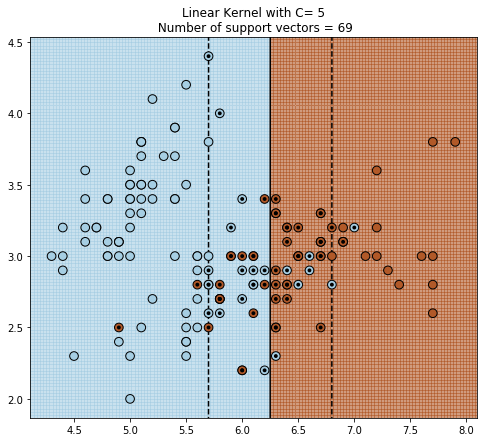

In [21]:
from sklearn import svm
X_train2 = np.array(X2.values.tolist())
y_train2 = np.array(ynew2.values.tolist())
C=5
clf = svm.SVC(kernel='linear',C = C )
clf.fit(X_train2, y_train2)
plt.figure(1)
plt.clf()
plt.scatter(X_train2[:, 0], X_train2[:, 1], c=q2, zorder=10, cmap=cm.Paired,alpha=1,edgecolor='k',s=75)
plt.axis('tight')
x_min = X_train2[:, 0].min()-1
x_max = X_train2[:, 0].max()+1
y_min = X_train2[:, 1].min()-1
y_max = X_train2[:, 1].max()+1
XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0, cmap=cm.Paired, alpha=0.6)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],linestyles=['--', '-', '--'], levels=[-1, 0, 1])
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],s=15, lw=0.001, facecolors='none',zorder=10,c='k', edgecolors='none');
print(clf.coef_)
print(clf.intercept_)
plt.title("Linear Kernel with C= {}\n Number of support vectors = {}".format(C, len(clf.support_vectors_)))

# (iv)

With increase in gamma we decrease the variance of the RBF fit, which indicates that for a test point the classification only looks around its neighbour points. Hence with increase in value of gamma we overfit the data.


Similarly with increase degree of the polynomial we overfit the data.

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please 

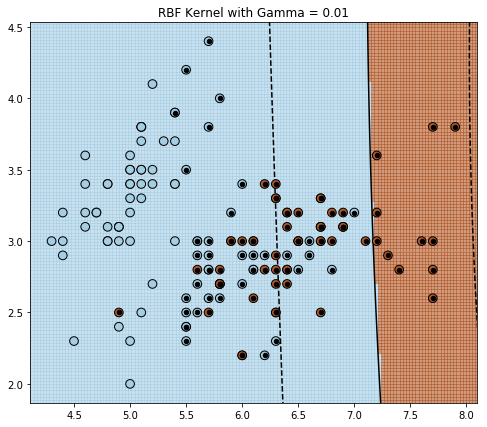

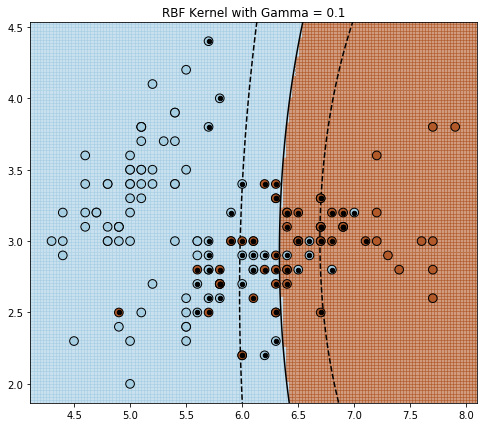

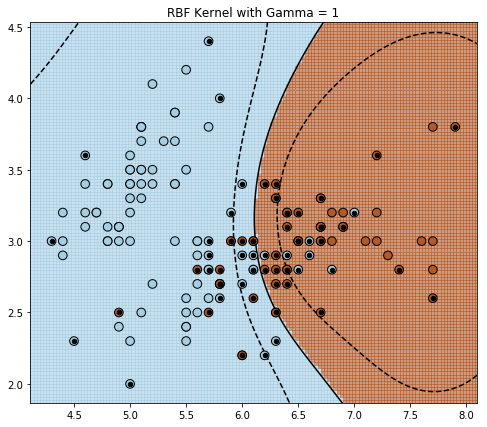

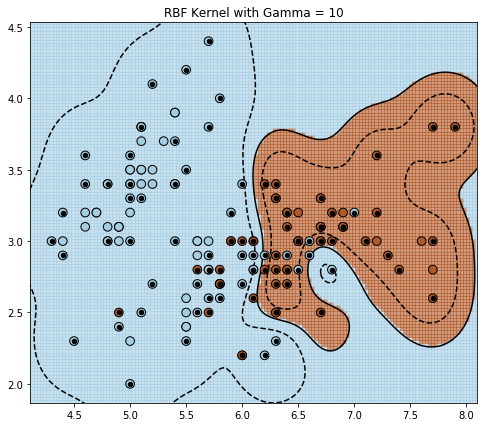

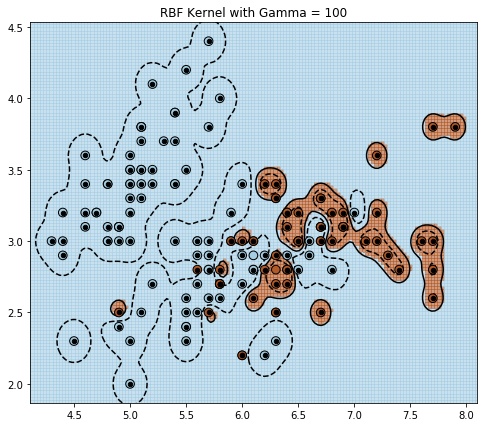

In [25]:
from sklearn import svm
X_train2 = np.array(X2.values.tolist())
y_train2 = np.array(ynew2.values.tolist())
kernel = 'rbf'
for fig_num, gamma in enumerate([0.01,0.1,1,10,100]):
    clf = svm.SVC(kernel=kernel, gamma=gamma)
    clf.fit(X_train2, y_train2)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X_train2[:, 0], X_train2[:, 1], c=q2, zorder=10, cmap=cm.Paired,alpha=1,edgecolor='k',s=75)

    plt.axis('tight')
    x_min = X_train2[:, 0].min()-1
    x_max = X_train2[:, 0].max()+1
    y_min = X_train2[:, 1].min()-1
    y_max = X_train2[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])

    plt.title("RBF Kernel with Gamma = {}".format(gamma))
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k',
                edgecolor='k', s=20)

C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\rendl\Anaconda2\envs\py36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change f

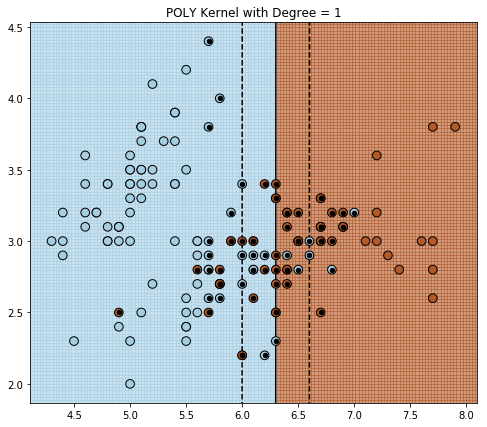

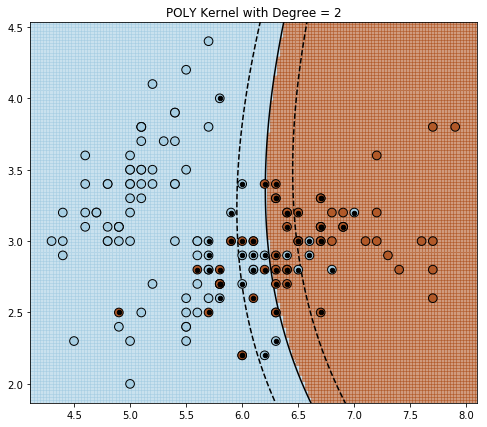

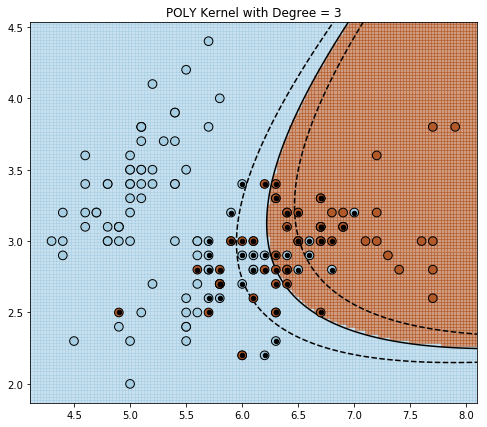

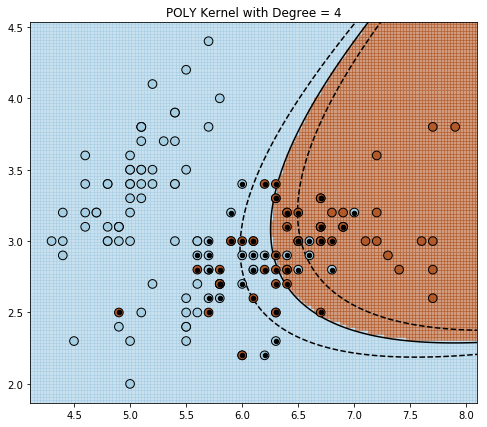

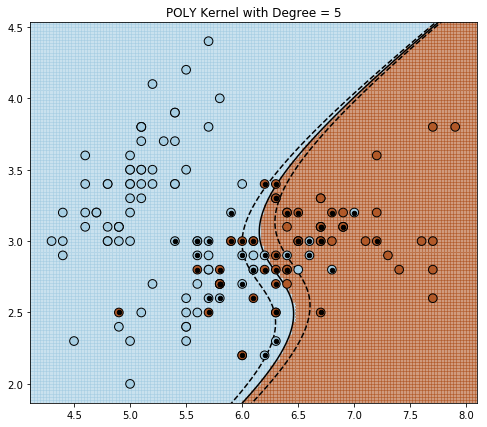

In [26]:
from sklearn import svm
X_train2 = np.array(X2.values.tolist())
y_train2 = np.array(ynew2.values.tolist())
kernel = 'poly'
for fig_num, degree in enumerate([1,2,3,4,5]):
    clf = svm.SVC(kernel=kernel, degree=degree)
    clf.fit(X_train2, y_train2)

    plt.figure(fig_num)
    plt.clf()
    plt.scatter(X_train2[:, 0], X_train2[:, 1], c=q2, zorder=10, cmap=cm.Paired,alpha=1,edgecolor='k',s=75)

    plt.axis('tight')
    x_min = X_train2[:, 0].min()-1
    x_max = X_train2[:, 0].max()+1
    y_min = X_train2[:, 1].min()-1
    y_max = X_train2[:, 1].max()+1

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.6)

    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
                linestyles=['--', '-', '--'], levels=[-0.5, 0, 0.5])

    plt.title("POLY Kernel with Degree = {}".format(degree))
    svs = clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1],  zorder=20, cmap=plt.cm.Paired,c='k',
                edgecolor='k', s=20)